<a href="https://colab.research.google.com/github/awesomedeba10/Zomato-Restaurant-Clustering-Sentiment-Analysis----AlmaBetter-Capstone-Project/blob/main/Capstone_Project_Zomato_Restaurant_Clustering_and_Sentiment_Analysis_by_Debanjan_Ganguly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Problem Approach

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


### Importing Base Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from wordcloud import WordCloud

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 6.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6ee19df70656bc96508b1e4014942d3bba1ac0f6f292928b7a45ef20ed53f539
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

### Data Exploration

In [51]:
df_metas = pd.read_csv('/gdrive/MyDrive/Data Science - Almabetter/Capstone Project/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
df_reviews = pd.read_csv('/gdrive/MyDrive/Data Science - Almabetter/Capstone Project/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')

In [52]:
df_metas.shape, df_reviews.shape

((105, 6), (10000, 7))

In [53]:
df_metas.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [54]:
df_metas.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [55]:
df_metas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [56]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [57]:
df_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [58]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


### Checking for NA Values

In [59]:
df_metas.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

`Collections` column contains more than 50% null values, we're not taking this into consideration then

In [60]:
df_reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [61]:
df_reviews.dropna(inplace=True)

Review dataset contains very less percentage of null values, we will handle these as we explore each attributes importances later

### Exploratory Data Analysis

#### Most Expensive & Cheap Restaurants

In [62]:
df_metas['Cost'] = df_metas['Cost'].apply(lambda x: int(x.replace(',', '')))

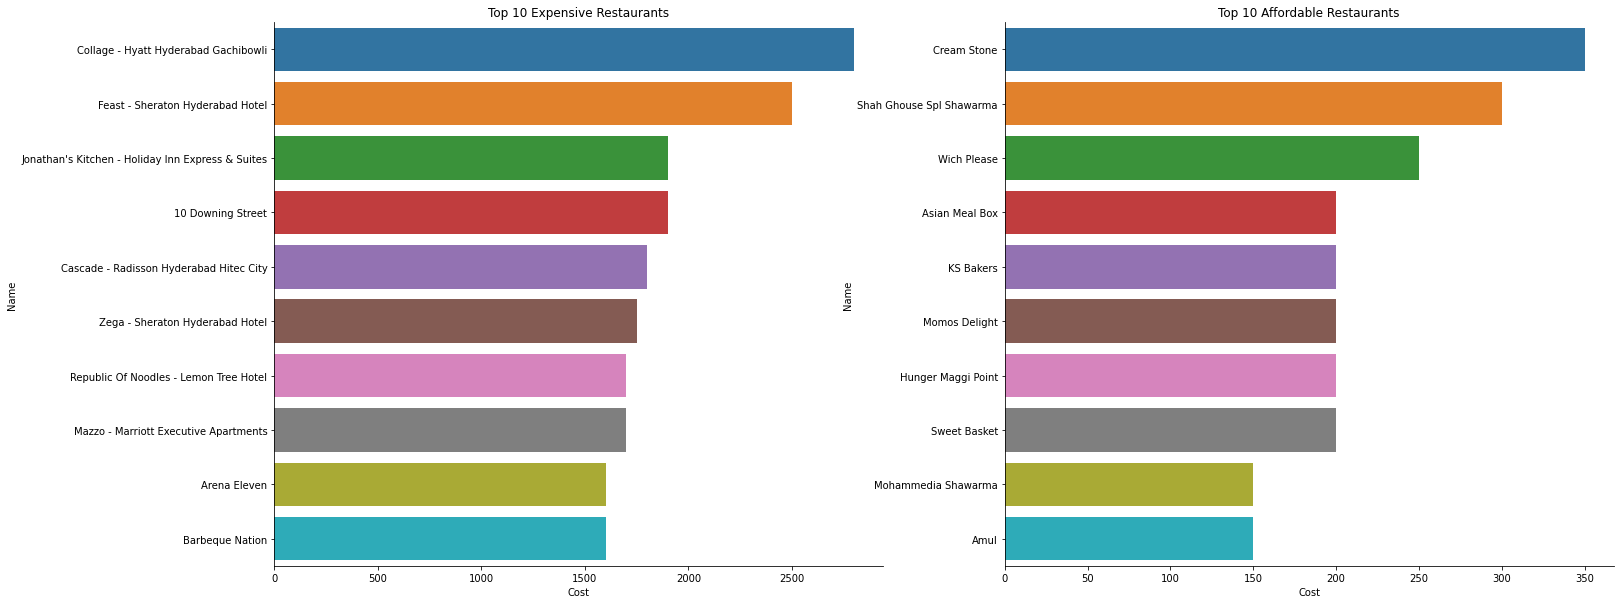

In [63]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 10))

sns.barplot(data=df_metas, x='Cost', y='Name', order=df_metas.sort_values('Cost', ascending=False).Name[:10], ax=axes[0])
sns.barplot(data=df_metas, x='Cost', y='Name', order=df_metas.sort_values('Cost', ascending=False).Name[-10:], ax=axes[1])

axes[0].set_title('Top 10 Expensive Restaurants')
axes[1].set_title('Top 10 Affordable Restaurants')
sns.despine()

#### Restaurants by Ratings

We'll get avg ratings for all restaurant, before that we'll drop all na columns from review dataset

In [64]:
df_reviews['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [65]:
df_reviews = df_reviews[df_reviews['Rating'] != 'Like'] # Removing malformed rating value
df_reviews['Rating'] = df_reviews['Rating'].apply(float)
df_avg_ratings = df_reviews.groupby('Restaurant')['Rating'].mean().reset_index()

df_avg_ratings.rename({'Rating': 'avg_ratings'}, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



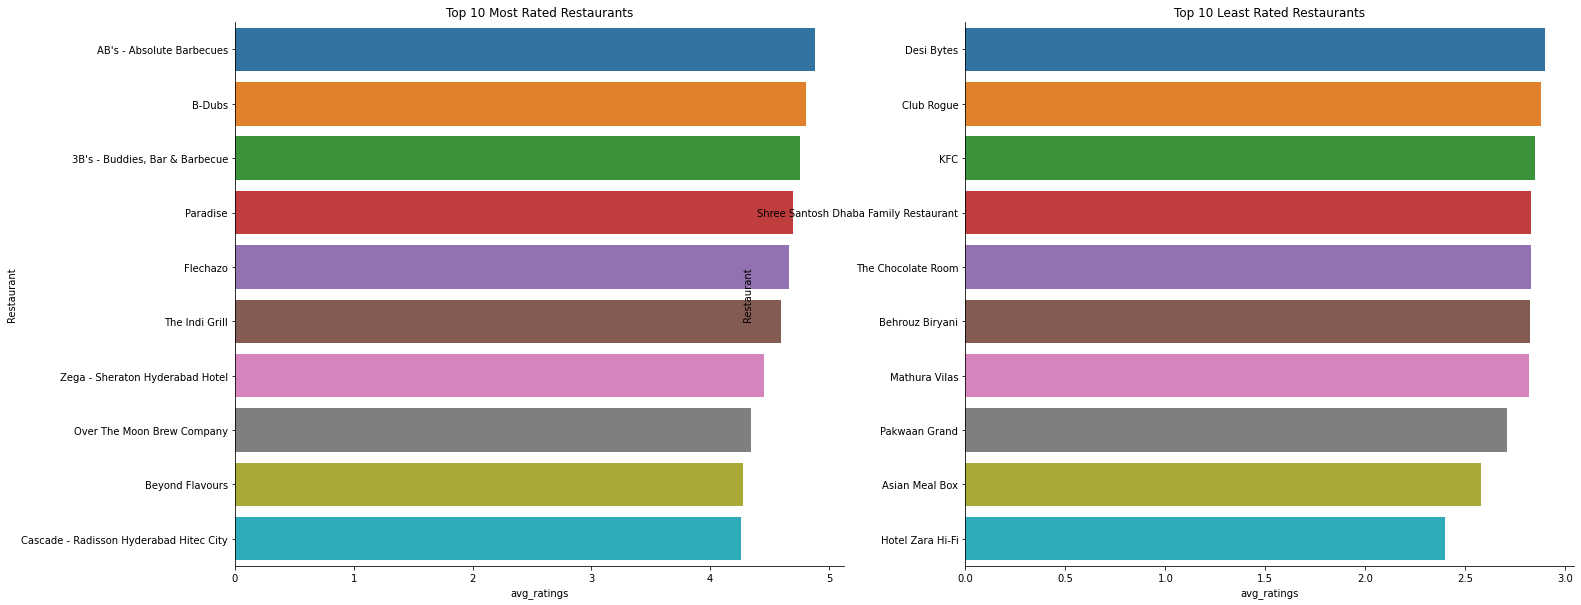

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 10))

sns.barplot(data=df_avg_ratings, x='avg_ratings', y='Restaurant',
            order=df_avg_ratings.sort_values('avg_ratings', ascending=False).Restaurant[:10], ax=axes[0])
sns.barplot(data=df_avg_ratings, x='avg_ratings', y='Restaurant', 
            order=df_avg_ratings.sort_values('avg_ratings', ascending=False).Restaurant[-10:], ax=axes[1])

axes[0].set_title('Top 10 Most Rated Restaurants')
axes[1].set_title('Top 10 Least Rated Restaurants')
sns.despine()

We're merging avg ratings with our restaurants info dataset, might be use full while clustering

In [67]:
df_metas = pd.merge(df_metas, df_avg_ratings, left_on='Name', right_on='Restaurant')
df_metas.drop('Restaurant', axis=1, inplace=True)

#### Distribution of Ratings

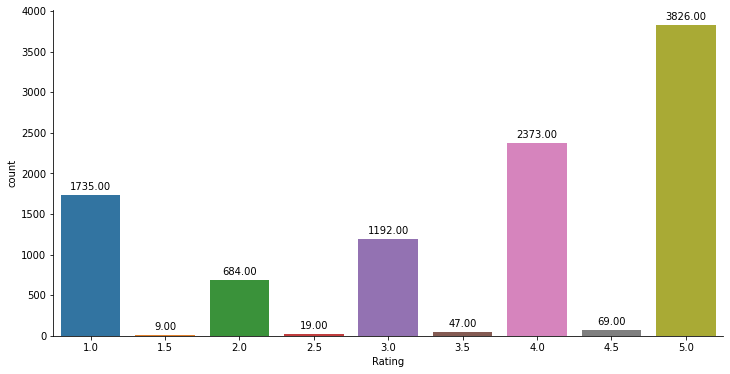

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_reviews, x='Rating', order=df_reviews.groupby('Rating').count().index)

xs = np.arange(0,9,1) # creating array for total length of rating type
ys = df_reviews.groupby('Rating').count()['Review']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)

sns.despine()

#### Avg Rating vs Cost

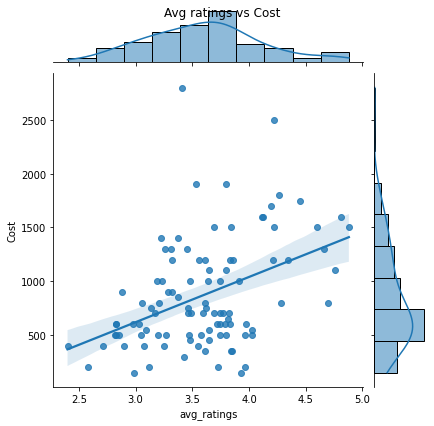

In [69]:
# fig = plt.figure(figsize=(12, 6))
# sns.regplot(data=df_metas, y='Cost', x='avg_ratings')
g = sns.jointplot(y='Cost', x='avg_ratings', kind="reg", data=df_metas, height=6)
plt.suptitle('Avg ratings vs Cost')
plt.show()

Though a clear linear relationship can not be observed, but normally we can see some densed grouped low budget restaurants with low avg ratings.

#### Most available cuisine options

In [70]:
df_cuisine = df_metas.loc[:,['Name','Cost','Cuisines']]
df_cuisine['cuisines'] = df_cuisine['Cuisines'].apply(lambda x: list(set(x.lower().split(', '))))
df_cuisine=df_cuisine.explode('cuisines')
df_cuisine.head()

,Name,Cost,Cuisines,cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",kebab
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",south indian
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",north indian
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",continental
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",chinese


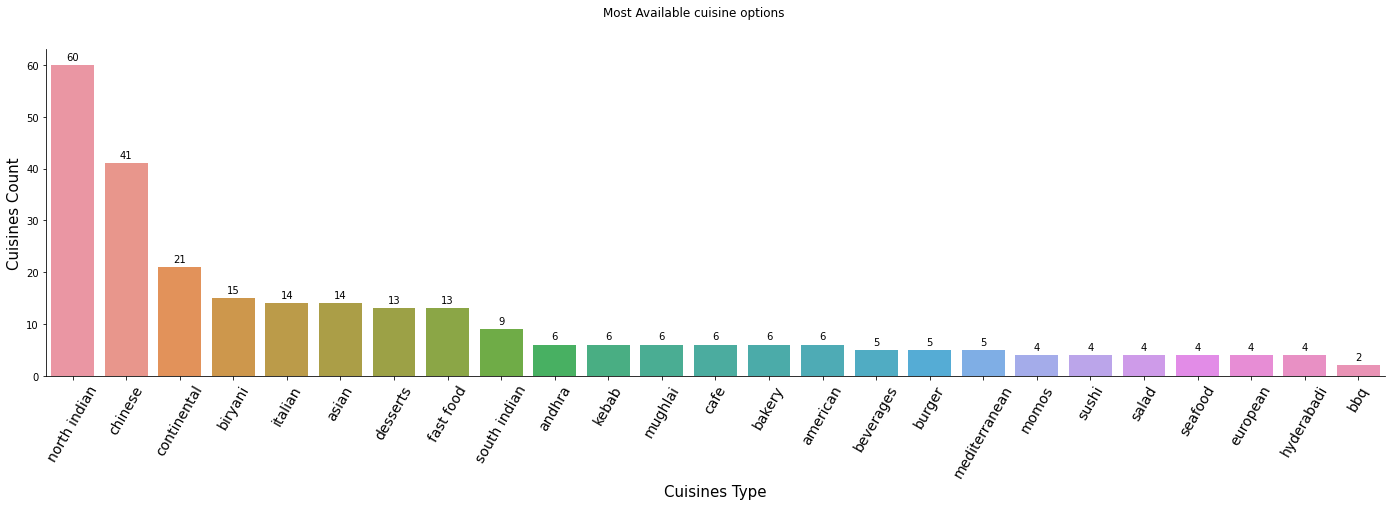

In [71]:
fig, axes = plt.subplots(figsize=(24, 6))
cuisines_count_df = df_cuisine['cuisines'].value_counts().reset_index()
cuisines_count_df['name'] = cuisines_count_df['index']
show_count = 25

sns.barplot(data=cuisines_count_df, y='cuisines', x='name',
            order=cuisines_count_df.sort_values('cuisines', ascending=False).name[:show_count])

xs = np.arange(0,show_count,1) # creating array for total length of rating type
ys = cuisines_count_df.sort_values('cuisines', ascending=False).cuisines[:show_count]

for x,y in zip(xs,ys):
    # label = "{:.2f}".format(y)
    plt.annotate(y, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)

plt.xlabel('Cuisines Type',size=15)
plt.ylabel('Cuisines Count',size=15)
plt.xticks(rotation=60, size=14)
plt.suptitle('Most Available cuisine options')
sns.despine()

Spicy north Indian & Chinese food (the Indian accent of Chinese are also spicy one) are the most available cuisines served.

#### Reviewers' with most Reviews

In [72]:
df_reviewers = df_reviews.groupby('Reviewer').agg({'Reviewer': 'count', 'Rating': 'mean'})
df_reviewers.index.names = ['Reviewer Name']
df_reviewers.rename({'Reviewer': 'Review Count', 'Rating': 'Avg Rating'}, axis=1, inplace=True)
df_reviewers.sort_values('Review Count', ascending=False, inplace=True)

print(f'Total unique reviewer count {df_reviewers["Review Count"].count()}. Avg {df_reviewers["Review Count"].mean()} reviews submitted. Average {df_reviewers["Avg Rating"].mean()} rating submitted')

Total unique reviewer count 7442. Avg 1.3375436710561677 reviews submitted. Average 3.578301536992077 rating submitted


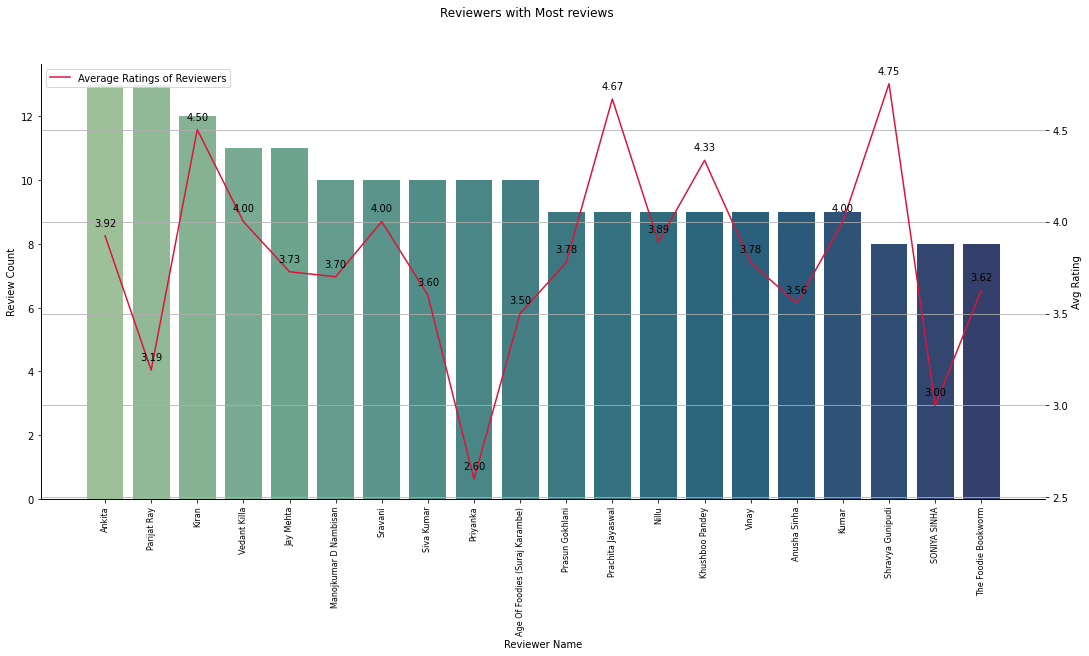

In [73]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(data=df_reviewers, x=df_reviewers.index, y='Review Count', palette='crest',
            order=df_reviewers.sort_values('Review Count', ascending=False).index[:20], ax=ax)
plt.xticks(rotation=90, size=8)

ax2 = ax.twinx()
sns.lineplot(data=df_reviewers.sort_values('Review Count', ascending=False).head(20), 
             x=df_reviewers.index[:20], y='Avg Rating', ax=ax2, color='crimson', sort=False)

xs = np.arange(0,20,1)
ys = df_reviewers.sort_values('Review Count', ascending=False).head(20)['Avg Rating']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)

# plt.bar(rats['Average Ratings'],color='cyg')
plt.suptitle('Reviewers with Most reviews')
plt.legend(['Average Ratings of Reviewers'])
plt.grid()
sns.despine()

#### Ratings of Restaurants by Top Reviewer

In [74]:
def custom_feature_engg(x, arr_pos1 = 0, arr_pos2 = 0):
    x_list = x.replace('[', '').replace(']', '').split(',')
    try:
        return x_list[arr_pos1].strip().split(' ')[arr_pos2]
    except IndexError:
        # It means those has no followers actually
        return 0

df_reviews['Total_review'] = df_reviews['Metadata'].apply(custom_feature_engg)
df_reviews['Followers'] = df_reviews['Metadata'].apply(lambda x: custom_feature_engg(x, 1, 0))

We will find top reviewers sorted by their number of followers, their Total_review (the given one, not the calculated one from dataset)

In [75]:
top_reviews = pd.merge(df_reviews, df_reviewers, left_on='Reviewer', right_on=df_reviewers.index)
top_reviews['Followers'] = top_reviews['Followers'].apply(int)
top_reviews['Total_review'] = top_reviews['Total_review'].apply(int)

top_reviewer = top_reviews.nlargest(n=45, columns=['Followers', 'Total_review'], keep='all')
top_reviewer['Reviewer'].value_counts()

Foodies Hyderabad                            4
Srinivas                                     4
Food Nawabs                                  4
Satwinder Singh                              3
Asad Rana                                    3
ASH&B2                                       3
Varun Reddy                                  3
Samar Sardar                                 2
Hungry Eyes                                  2
Dinesh Jana                                  2
Shiva Chary                                  1
Hyderabadfoodexplorer (sanchay Gumidelli)    1
Abhilash Pradhan (AbTheFoodie)               1
Avik Ghosh Gluttonous_Bhukkad                1
SRK 😍👌🍸🍻🍾🦀                                   1
Gautam Dev                                   1
Rakesh Bandiwar                              1
Vasantha Lakshmi                             1
Eat_vth_me                                   1
Aarti Kamath                                 1
FooD HUNTer                                  1
#FOODPORN    

In [76]:
rating_pivot = pd.pivot(top_reviewer, values='Rating', index='Restaurant', columns='Reviewer')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128076 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127864 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127867 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127870 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129408 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128076 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 127864 missing from current font.

/usr/local/lib/python3.7/dist-packages/ma

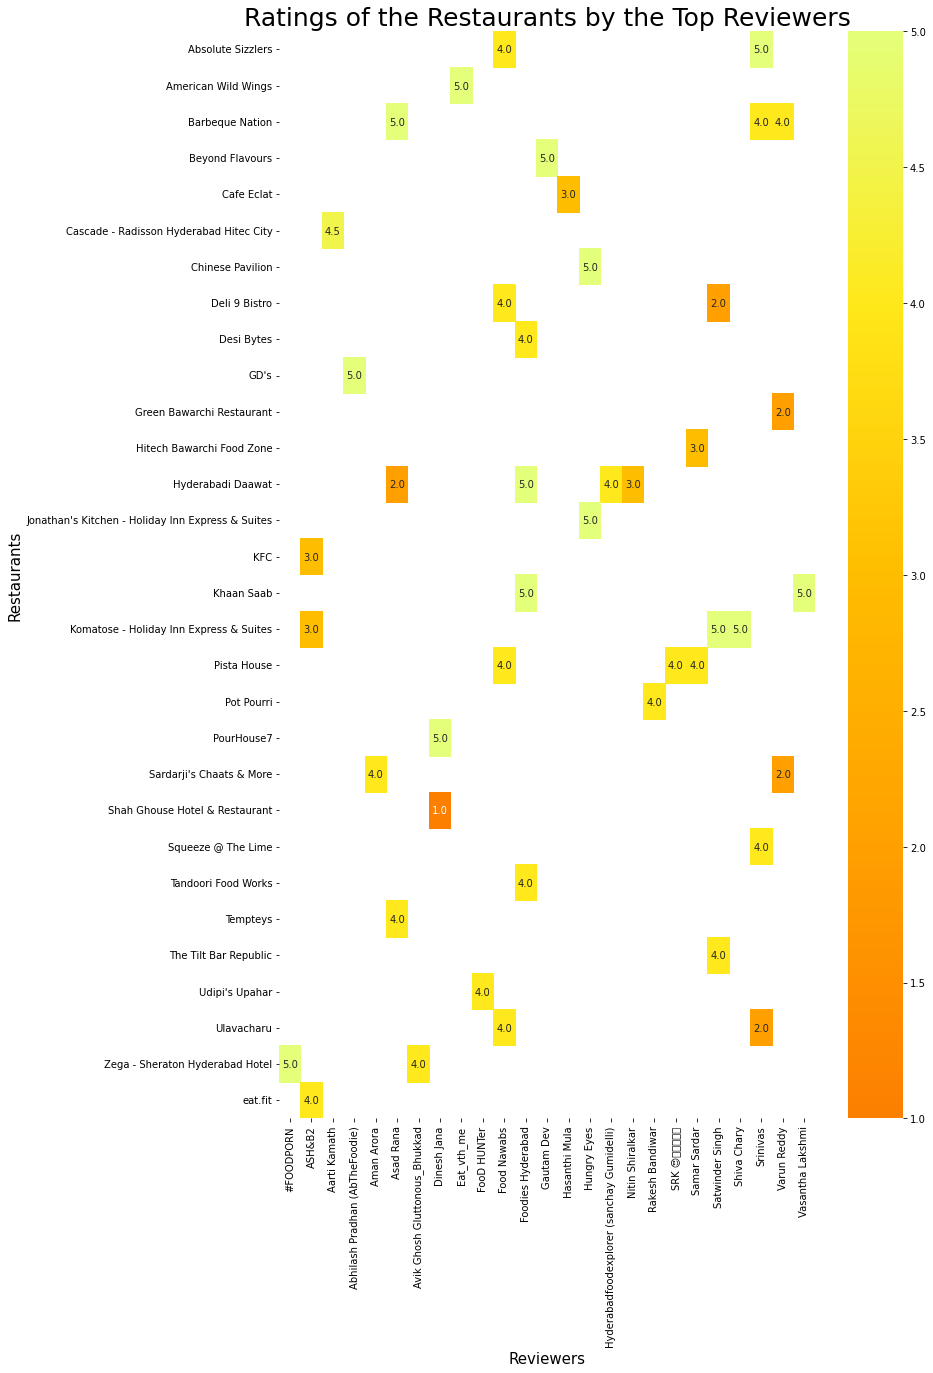

In [77]:
plt.figure(figsize=(12,20))
sns.heatmap(rating_pivot, annot=True, fmt='.1f', cmap='Wistia_r')
plt.xlabel('Reviewers', size=15)
plt.ylabel('Restaurants', size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers', size=25)

# plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
# plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

plt.show()

In [78]:
def categorise_demographic_cuisine(c):
    """ Cuisines are hand curated to fall into a broader
    demographic dish type """
    if c in ['continental', 'european', 'bbq', 'mexican', 'spanish', 'wraps', 'american', 'italian',
                'fast food', 'mediterranean', 'burger', 'european', 'pizza']:
        return 'Continental'
    elif c in ['thai', 'asian', 'japanese', 'chinese', 'indonesian', 'momos', 'seafood', 'sushi', 'healthy food']:
        return 'Oriental'
    elif c in ['bakery', 'ice cream', 'finger food', 'juices', 'desserts', 'cafe', 'beverages', 'salad']:
        return 'Dessert'
    elif c in ['hyderabadi', 'north indian', 'modern indian', 'street food', 'south indian', 'biryani', 
               'kebab', 'andhra', 'mughlai', 'hyderabadi', 'goan', 'north eastern']:
        return 'Indian'
    else:
        return 'Others'

In [79]:
df_cuisine['cuisine_type'] = df_cuisine['cuisines'].apply(categorise_demographic_cuisine)

df_cuisine_dummy = pd.get_dummies(df_cuisine, columns=["cuisine_type"], prefix=None)

In [80]:
cuisine_list = list(set(df_cuisine_dummy.columns)-set(['Name','Cost','Cuisines', 'cuisines']))
prepared_df = df_cuisine_dummy.groupby(['Name'])[cuisine_list].sum().reset_index()

#### Wordcloud of Reviews

In [42]:
pos_reviews = df_reviews[df_reviews['Rating'] >= 3]['Review']

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, height=350, width=650, background_color="white", 
                    normalize_plurals=False).generate(' '.join(list(pos_reviews.values)))

In [43]:
neg_reviews = df_reviews[df_reviews['Rating'] < 3]['Review']

wordcloud_neg = WordCloud(max_font_size=50, max_words=100, height=350, width=650, background_color="white", 
                    normalize_plurals=False).generate(' '.join(list(neg_reviews.values)))

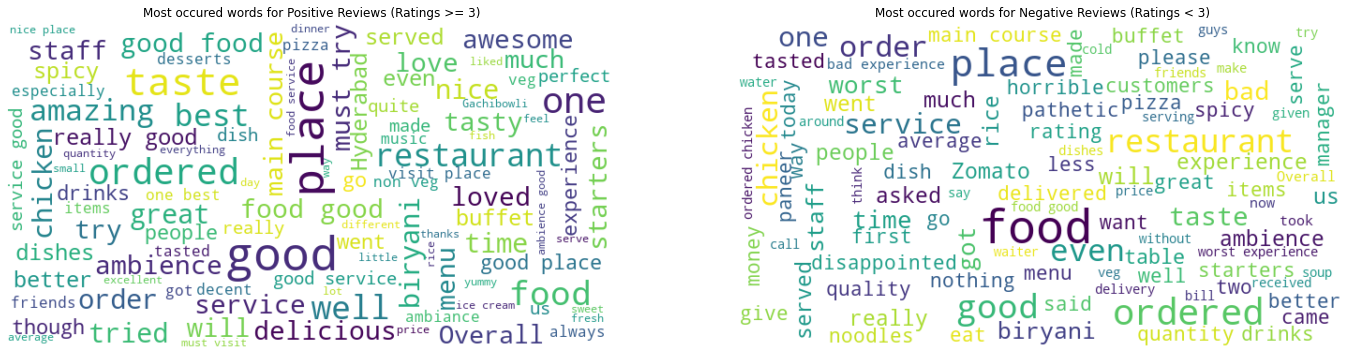

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(24, 20))

plt.sca(axes[0])
plt.imshow(wordcloud_pos, interpolation="bilinear")

plt.sca(axes[1])
plt.imshow(wordcloud_neg, interpolation="bilinear")

axes[0].axis('off')
axes[0].set_title('Most occured words for Positive Reviews (Ratings >= 3)')

axes[1].axis('off')
axes[1].set_title('Most occured words for Negative Reviews (Ratings < 3)')

plt.show()

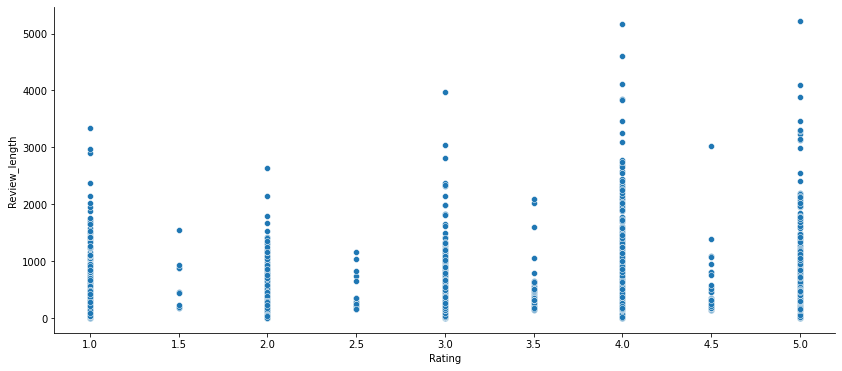

In [81]:
df_reviews['Review_length'] = df_reviews['Review'].apply(len)

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_reviews, x='Rating', y='Review_length')
sns.despine()

In [46]:
fig = px.scatter_3d(df_reviews, x='Review_length', y='Total_review', z='Rating')
fig.update_layout(title_text="Review Length vs Rating vs Number of Reviews ")
fig.show()

Normally, longer reviews tends to be a review with a good rating

### Clustering

As  we've 42 different cuisine options available, we've grouped these into five parent categories, or else data will be of much higher dimensional results in poor clustering. Along with these we've considered Cost and avg_ratings for clustering too.

In [82]:
prepared_df = prepared_df.merge(df_metas[['Cost', 'avg_ratings', 'Name']], on='Name')

`prepared_df` is the finally prepared dataframe to be used for clustering. It has column `Name` which will not be included for clustering.

In [48]:
prepared_df.sample(5)

,Name,cuisine_type_Dessert,cuisine_type_Oriental,cuisine_type_Continental,cuisine_type_Indian,cuisine_type_Others
63,Mustang Terrace Lounge,1,1,2,1,0
58,Marsala Food Company,0,1,0,1,1
85,Tandoori Food Works,0,0,1,2,0
80,Shanghai Chef 2,0,4,0,0,0
5,Al Saba Restaurant,0,2,0,3,0


In [83]:
prepared_df_cl = prepared_df.iloc[:, 1:].copy() # removing `Name` column

#### Feature Normalization

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(prepared_df_cl)

#### KMeans

In [89]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    if(k > 1):
        silhoutte_score = silhouette_score(X, km.labels_)
    else:
        silhoutte_score = 0
    sse.append({
        'n_clusters': k,
        'sse': km.inertia_,
        'silhoutte_score': silhoutte_score
    })

In [90]:
cluster_results = pd.DataFrame(sse)
cluster_results

,n_clusters,sse,silhoutte_score
0,1,700.000000,0.000000
1,2,562.653319,0.218599
2,3,453.184320,0.260951
3,4,350.574971,0.290576
4,5,294.220152,0.326504
5,6,249.797888,0.313108
6,7,223.572133,0.263316
7,8,208.259074,0.238723
8,9,195.294558,0.255188


##### Choosing number of clusters

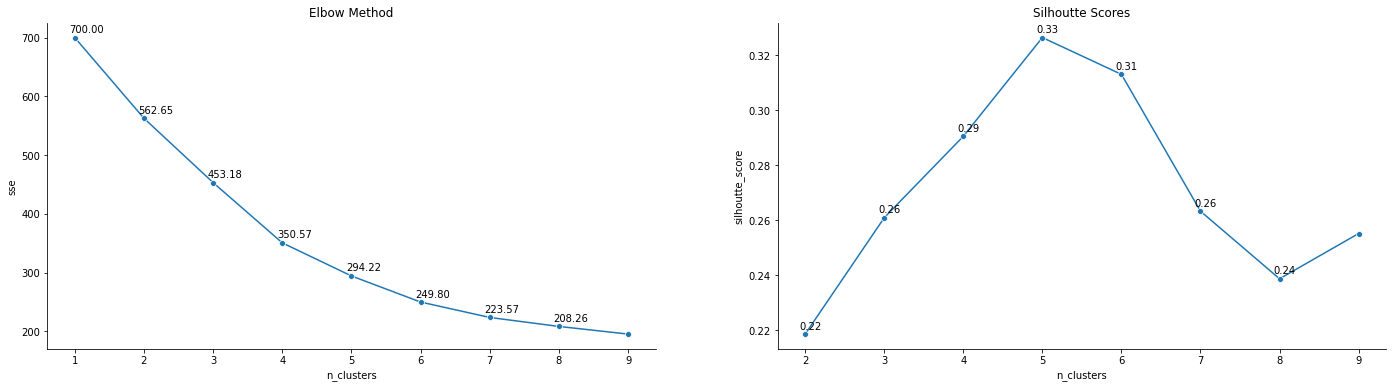

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(24,6))

sns.lineplot(data=cluster_results, x='n_clusters', y='sse', marker = "o", ax=axes[0])

sns.lineplot(data=cluster_results[1:], x='n_clusters', y='silhoutte_score', marker = "o", ax=axes[1])

xs = np.arange(1,9,1) # creating array for total length of rating type
ys = cluster_results['sse']
zs = cluster_results['silhoutte_score']

for x, y, z in zip(xs, ys, zs):
    label = "{:.2f}".format(y)
    axes[0].annotate(label, # text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(12,5), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black',
                 clip_on=True)
    
    label_sil = "{:.2f}".format(z)
    axes[1].annotate(label_sil, # text
                (x,z), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(5,5), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                color='black',
                clip_on=True)

axes[0].set_title('Elbow Method')
axes[1].set_title('Silhoutte Scores')
sns.despine()

From the elbow method, we're getting our elbow on `n_clusters = 4`, but from the silhouette score, it is max for `n_clusters = 5`. We know, elbow method is absolutely based on ones perception, so we will plot silhoutte score for clusters range of 3 to 6.

For n_clusters = 3 The average silhouette_score is : 0.2609511070306186
For n_clusters = 4 The average silhouette_score is : 0.2905761270487022
For n_clusters = 5 The average silhouette_score is : 0.32650442049194583
For n_clusters = 6 The average silhouette_score is : 0.3131077512101836


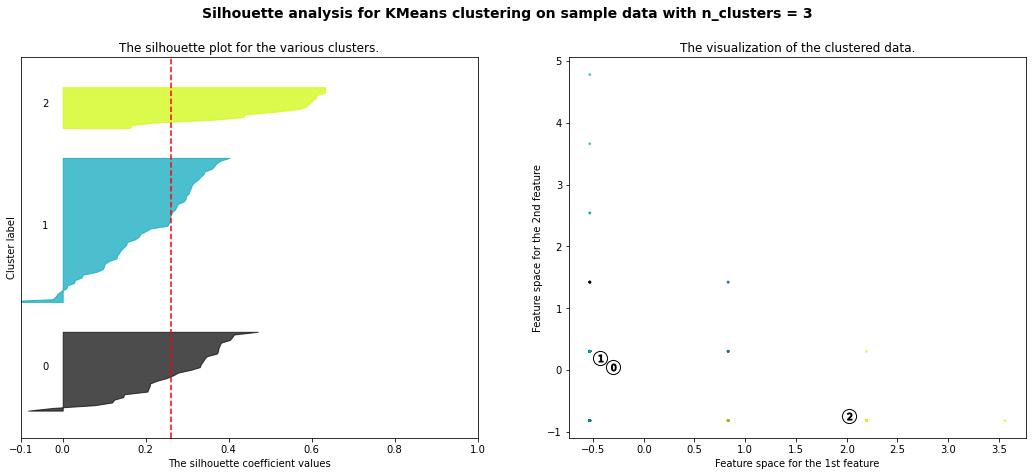

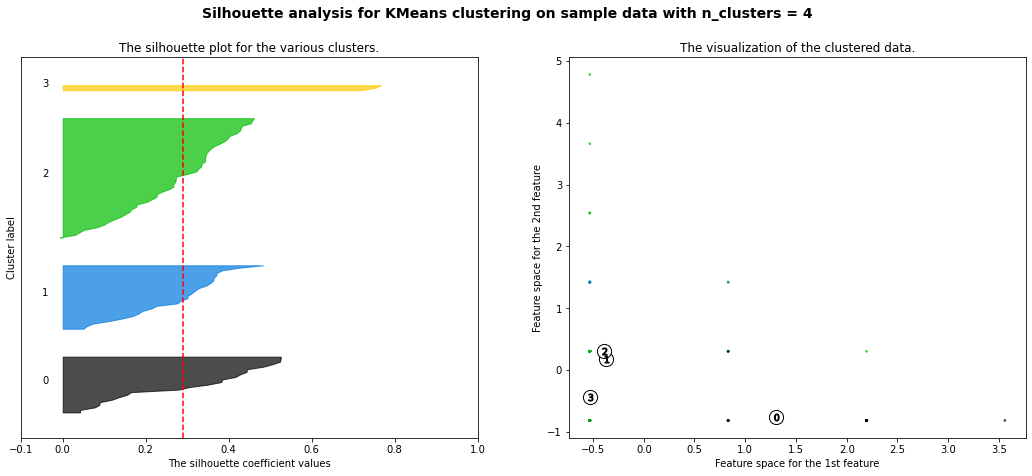

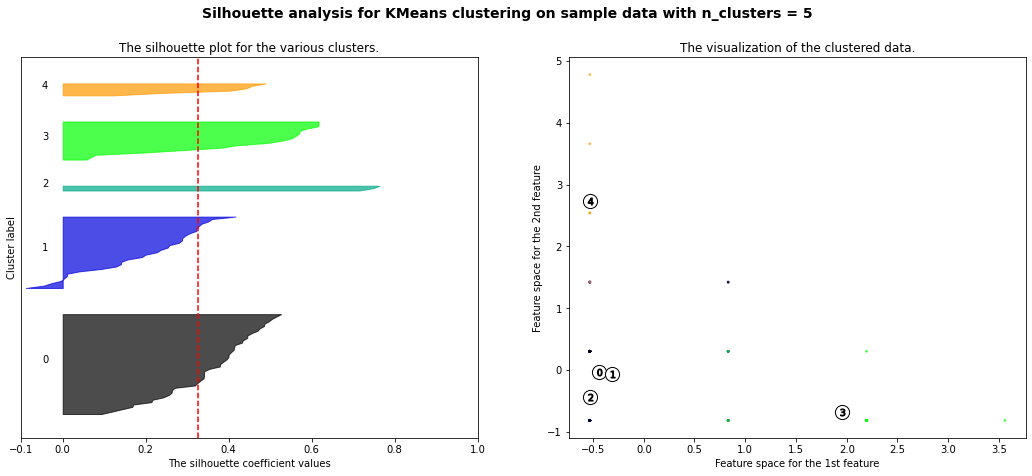

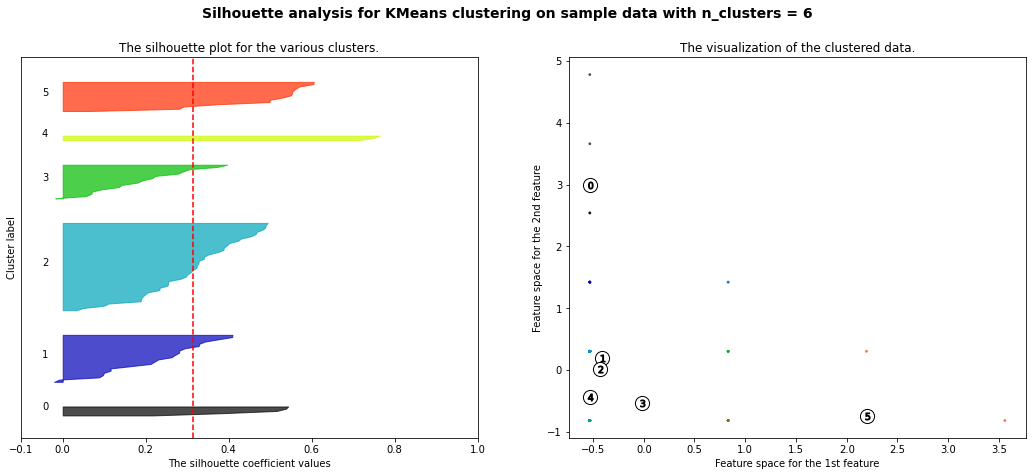

In [92]:
# Reference
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for n_clusters in [3, 4, 5, 6]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From silhouette analysis, we can identify that `n_clusters = 4` is the optimum number of clusters we're looking for. We'll run KMeans with cluster count of 4 now...

##### Evaluating clusters

In [93]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(X)

clusters = kmeans.predict(X)
prepared_df['clusters'] = clusters

In [94]:
prepared_df.sample(5)

,Name,cuisine_type_Dessert,cuisine_type_Oriental,cuisine_type_Continental,cuisine_type_Indian,cuisine_type_Others,Cost,avg_ratings,clusters
36,Frio Bistro,0,0,4,0,0,1200,3.610,1
61,Mustang Terrace Lounge,1,1,2,1,0,1300,3.310,1
32,Eat India Company,1,0,0,2,0,1300,3.260,2
37,GD's,0,0,2,0,0,500,3.960,0
31,Dunkin' Donuts,3,0,2,0,0,550,3.095,0


In [95]:
df_cuisine_clusters = df_cuisine.merge(prepared_df[['clusters', 'Name']], on='Name')

In [96]:
for i in range(4):
    print(f'Cuisines grouped within clusters = {i} :')
    print(df_cuisine_clusters[df_cuisine_clusters["clusters"] == i]['cuisines'].unique())
    print('-----------------------------------------')
    print('-----------------------------------------')

Cuisines grouped within clusters = 0 :
['desserts' 'ice cream' 'finger food' 'north indian' 'italian' 'fast food'
 'burger' 'continental' 'cafe' 'bakery' 'wraps' 'american' 'beverages'
 'biryani' 'salad' 'chinese' 'pizza']
-----------------------------------------
-----------------------------------------
Cuisines grouped within clusters = 1 :
['kebab' 'south indian' 'north indian' 'continental' 'chinese' 'european'
 'mediterranean' 'desserts' 'asian' 'goan' 'seafood' 'bbq' 'american'
 'japanese' 'salad' 'sushi' 'italian' 'mexican' 'spanish' 'modern indian']
-----------------------------------------
-----------------------------------------
Cuisines grouped within clusters = 2 :
['biryani' 'chinese' 'north indian' 'beverages' 'seafood' 'healthy food'
 'continental' 'south indian' 'kebab' 'american' 'street food' 'fast food'
 'mughlai' 'andhra' 'bakery' 'juices' 'hyderabadi' 'finger food' 'thai'
 'asian' 'indonesian' 'momos' 'japanese' 'sushi' 'burger' 'north eastern']
-----------------

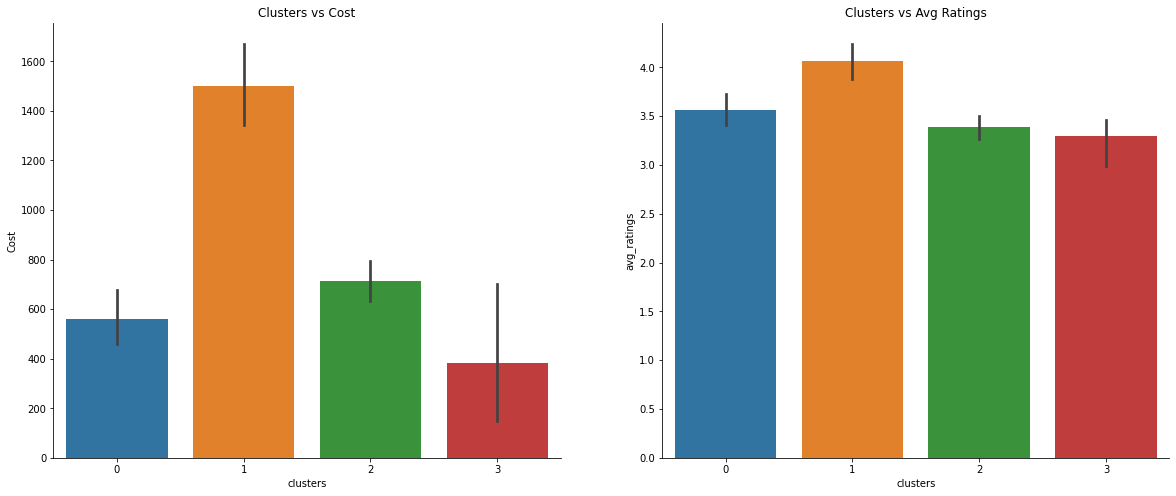

In [97]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.barplot(data=prepared_df, x='clusters', y='Cost', ax=axes[0])
sns.barplot(data=prepared_df, x='clusters', y='avg_ratings', ax=axes[1])

axes[0].set_title('Clusters vs Cost')
axes[1].set_title('Clusters vs Avg Ratings')

sns.despine()

Cluster 1 is amongst the expensive restaurants (as well as the ratings were higher than rest). Cluster 3 contains most fewer restaurants with cuisines options of most spiciest.

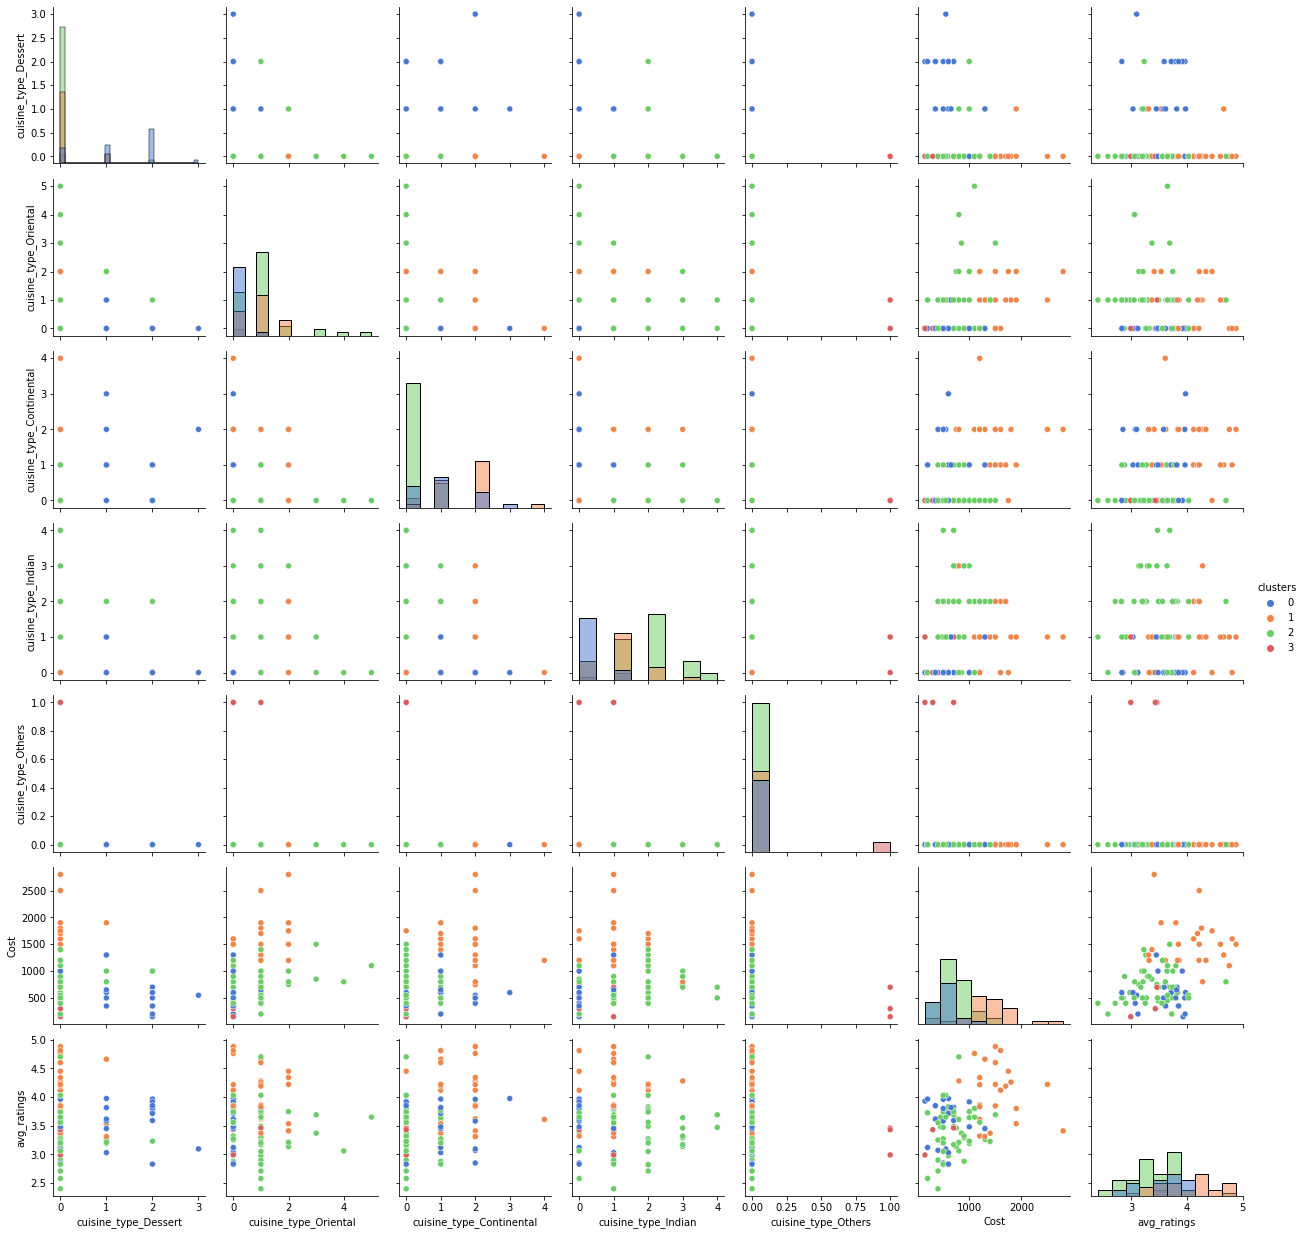

In [98]:
g = sns.PairGrid(prepared_df, hue="clusters", palette='muted')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

##### Visualization with t-SNE

Clearly, we're not being able to differentiate among clusters in 2d space, as we've 7 dimensional data. To visualize more precisely of how well our clusters have created, we will use t-SNE i.e. a dimensionality reduction technique to plot clusters to 2d and 3d space. It is similar to PCA, but unlike PCA t-SNE is non-linear.

In [99]:
sc = StandardScaler()
X_sc = sc.fit_transform(prepared_df.drop(['Name', 'clusters'], axis=1))
X_sc.shape

(100, 7)

In [ ]:
def generate_random_rgb_color_string(alpha = 0.8):
    color = list(np.random.choice(range(256), size=3))
    return f'rgba({color[0]}, {color[1]}, {color[2]}, {alpha})'

In [ ]:
def plot_tsne_2d(dataframe, cluster_column, clusters_count, perplexity):
    data = []

    for i in range(clusters_count):
        filtered_cluster = dataframe[dataframe[cluster_column] == i]
        trace = go.Scatter(
            x = filtered_cluster['TC1_2d'],
            y = filtered_cluster['TC2_2d'],
            mode = "markers",
            name = "Cluster " + str(i),
            marker = dict(color = generate_random_rgb_color_string()),
            text = None
        )
        data.append(trace)

    title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

    layout = dict(title = title,
            xaxis = dict(title= 'TC1', ticklen= 5, zeroline= False),
            yaxis = dict(title= 'TC2', ticklen= 5, zeroline= False)
        )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [ ]:
def plot_tsne_3d(dataframe, cluster_column, clusters_count, perplexity):
    data = []

    for i in range(clusters_count):
        filtered_cluster = dataframe[dataframe[cluster_column] == i]
        trace = go.Scatter3d(
            x = filtered_cluster['TC1_3d'],
            y = filtered_cluster['TC2_3d'],
            z = filtered_cluster['TC3_3d'],
            mode = "markers",
            name = "Cluster " + str(i),
            marker = dict(color = generate_random_rgb_color_string()),
            text = None
        )
        data.append(trace)

    title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

    layout = dict(title = title,
            xaxis = dict(title= 'TC1', ticklen= 5, zeroline= False),
            yaxis = dict(title= 'TC2', ticklen= 5, zeroline= False)
        )

    fig = dict(data = data, layout = layout)

    iplot(fig)

###### 2d Plot

In [ ]:
# t-SNE for 2 dimensional space
perplexity = 40
tsne_2d = TSNE(n_components=2, perplexity=perplexity)
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(X_sc))

# resembles 1st and 2nd components respectively
TCs_2d.columns = ["TC1_2d","TC2_2d"]

tsne_2d_df = TCs_2d.join(prepared_df[['clusters']])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
plot_tsne_2d(tsne_2d_df, cluster_column='clusters', clusters_count = 4, perplexity = perplexity)

Cluster 3 is seperated and has very less number of data within it. Cluster 0 has some data plotted very close to other clusters. Cluster 1 and Cluster 2 can be clearly differentiated.

###### 3d Plot

In [ ]:
#T-SNE with three dimensions
perplexity = 30
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

TCs_3d = pd.DataFrame(tsne_3d.fit_transform(X_sc))
TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

tsne_3d_df = TCs_3d.join(prepared_df[['clusters']])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
plot_tsne_3d(tsne_3d_df, cluster_column='clusters', clusters_count = 4, perplexity = perplexity)

#### Aggolomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

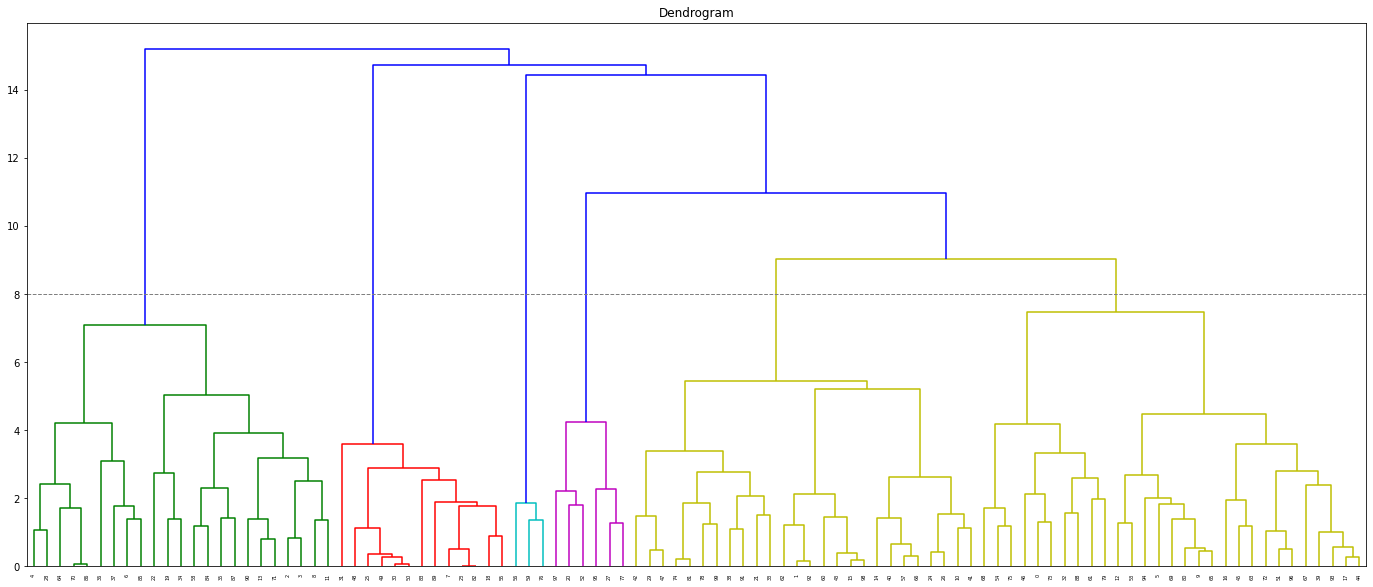

In [ ]:
plt.figure(figsize=(24,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.axhline(y=8, c='grey', lw=1, linestyle='dashed')

plt.title('Dendrogram')
plt.show()

Looking at the dendrogram, we've plotted a horizontal line upto which no vertical line intersect with any clusters. Given that 6 vertical lines cross the threshold, the optimal number of clusters is 6.



##### Evaluating clusters

In [ ]:
ag_hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
clusters = ag_hc.fit_predict(X)

prepared_df['hierchial_clusters'] = clusters

In [ ]:
df_cuisine_hc_clusters = df_cuisine.merge(prepared_df[['hierchial_clusters', 'Name']], on='Name')

In [ ]:
for i in range(6):
    print(f'Cuisines grouped within clusters = {i + 1} :')
    print(df_cuisine_hc_clusters[df_cuisine_hc_clusters["hierchial_clusters"] == i]['cuisines'].unique())
    print('-----------------------------------------')
    print('-----------------------------------------')

Cuisines grouped within clusters = 1 :
['european' 'chinese' 'kebab' 'continental' 'north indian' 'south indian'
 'biryani' 'seafood' 'beverages' 'american' 'finger food' 'italian'
 'salad' 'sushi' 'japanese' 'mexican' 'andhra' 'mughlai' 'juices' 'bakery'
 'hyderabadi']
-----------------------------------------
-----------------------------------------
Cuisines grouped within clusters = 2 :
['desserts' 'north indian' 'asian' 'mediterranean' 'chinese' 'continental'
 'seafood' 'goan' 'bbq' 'kebab' 'american' 'european' 'south indian'
 'italian' 'spanish' 'wraps' 'modern indian' 'burger' 'fast food' 'salad']
-----------------------------------------
-----------------------------------------
Cuisines grouped within clusters = 3 :
['continental' 'south indian' 'healthy food' 'north indian' 'street food'
 'fast food' 'burger' 'chinese' 'biryani' 'mughlai' 'asian' 'desserts'
 'kebab' 'momos' 'pizza' 'north eastern']
-----------------------------------------
-----------------------------------

Cluster 4 5 & 6 shows a wonderfull cuisine combination where 4th cluster has spicy combination, 5th cluster contains healthy & oriental combination and 6th cluster contains mostly dessert with an italian feels.

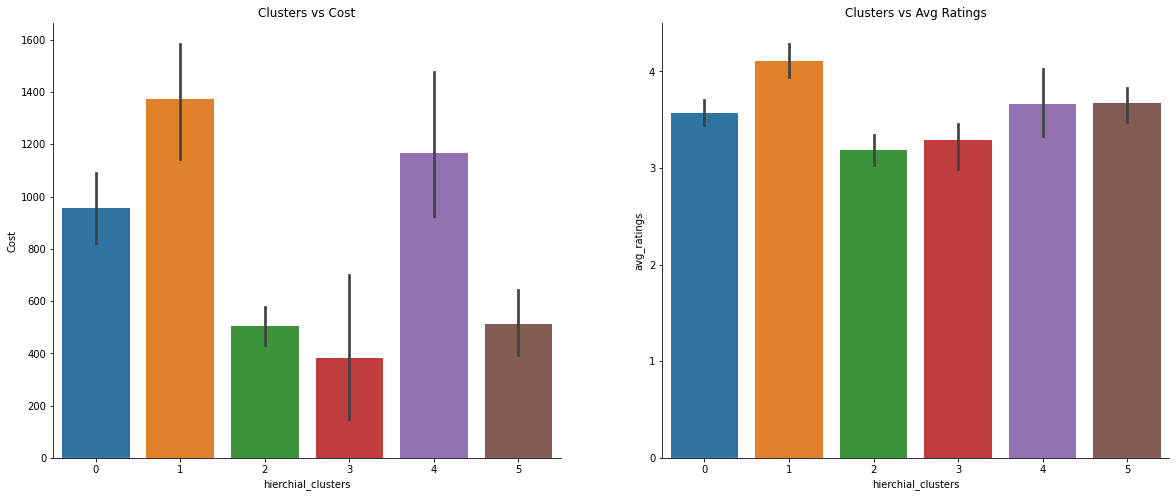

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.barplot(data=prepared_df, x='hierchial_clusters', y='Cost', ax=axes[0])
sns.barplot(data=prepared_df, x='hierchial_clusters', y='avg_ratings', ax=axes[1])

axes[0].set_title('Clusters vs Cost')
axes[1].set_title('Clusters vs Avg Ratings')

sns.despine()

##### Visualization with t-SNE

###### 2d Plot

In [ ]:
tsne_2d_hc_df = TCs_2d.join(prepared_df[['hierchial_clusters']])
plot_tsne_2d(tsne_2d_hc_df, cluster_column='hierchial_clusters', clusters_count = 6, perplexity = 40)

###### 3d Plot

In [ ]:
tsne_3d_hc_df = TCs_3d.join(prepared_df[['hierchial_clusters']])
plot_tsne_3d(tsne_3d_hc_df, cluster_column='hierchial_clusters', clusters_count = 6, perplexity = perplexity)

#### DBScan

Before applying dbscan, we need to obtain two hyper parameters (though we are free to tune it as necessary)

*   Min Samples per Cluster
*   Epsilon or the maximum distance to be considered as neighbours

Normally, in case of dimension greater than 2, min samples should be `2*Dimensions`. But we've to obtain epsilon too, to do that we will compute data proximity from each other using Nearest Neighbours


##### Finding hyper parameters

In [100]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2) 
nbrs.fit(X_sc)

distances, indices = nbrs.kneighbors(X_sc)

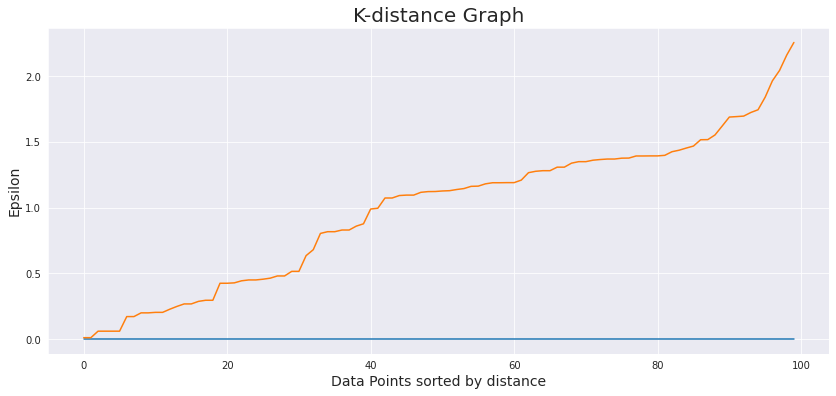

In [101]:
plt.figure(figsize=(14, 6))

distances = np.sort(distances, axis=0)
distances_sliced = distances[:, 1]

sns.set_style("darkgrid")
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

By looking at the curve visually, it looks like maximum curvature of the curve is about 1.75. So we took epsilon as 1.75 and min points as 2*7 = 14 (as we've 7 features within)

##### Evaluating Clusters

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1.75, min_samples = 14)
dbscan.fit(X_sc)

prepared_df['dbscan_clusters'] = dbscan.labels_

In [ ]:
prepared_df['dbscan_clusters'].value_counts()

-1    54
 0    46
Name: dbscan_clusters, dtype: int64

As we can see, dbscan hits most of samples as noisy one. 🧝

In [ ]:
df_cuisine_dbscan_clusters = df_cuisine.merge(prepared_df[['dbscan_clusters', 'Name']], on='Name')

In [ ]:
for i in [-1, 0]:
    print(f'Cuisines grouped within clusters = {i} :')
    print(df_cuisine_dbscan_clusters[df_cuisine_dbscan_clusters["dbscan_clusters"] == i]['cuisines'].unique())
    print('-----------------------------------------')
    print('-----------------------------------------')

Cuisines grouped within clusters = -1 :
['european' 'chinese' 'kebab' 'continental' 'north indian' 'south indian'
 'biryani' 'desserts' 'asian' 'mediterranean' 'seafood' 'beverages' 'goan'
 'lebanese' 'ice cream' 'bbq' 'american' 'burger' 'fast food' 'salad'
 'sushi' 'japanese' 'italian' 'mexican' 'mughlai' 'juices' 'bakery'
 'arabian' 'cafe' 'spanish' 'wraps' 'indonesian' 'thai' 'modern indian'
 'momos' 'pizza' 'street food']
-----------------------------------------
-----------------------------------------
Cuisines grouped within clusters = 0 :
['continental' 'south indian' 'healthy food' 'north indian' 'chinese'
 'kebab' 'american' 'street food' 'fast food' 'finger food' 'italian'
 'biryani' 'mughlai' 'andhra' 'hyderabadi' 'asian' 'bakery' 'salad'
 'burger' 'seafood' 'momos' 'north eastern']
-----------------------------------------
-----------------------------------------


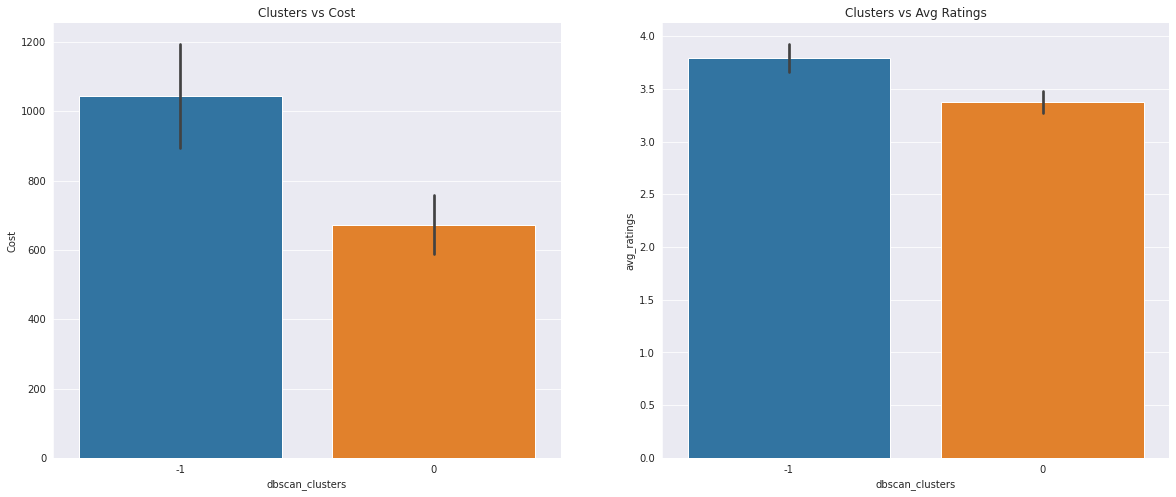

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.barplot(data=prepared_df, x='dbscan_clusters', y='Cost', ax=axes[0])
sns.barplot(data=prepared_df, x='dbscan_clusters', y='avg_ratings', ax=axes[1])

axes[0].set_title('Clusters vs Cost')
axes[1].set_title('Clusters vs Avg Ratings')

sns.despine()

Noisy grouped restaurants has higher avg cost, its because those are expensive and exclusive, so low in count also doesn't matched with others common kitchens.

It looks like mostly spicy continental foods are grouped within a cluster together. Others are classified as noisy

##### Visualization with t-SNE

To plot better, we're groouping all the -1 labeled clusters as 1

In [ ]:
prepared_df.loc[prepared_df["dbscan_clusters"] == -1, "dbscan_clusters"] = 1

###### 2d Plot

In [ ]:
tsne_2d_db_df = TCs_2d.join(prepared_df[['dbscan_clusters']])
plot_tsne_2d(tsne_2d_db_df, cluster_column='dbscan_clusters', clusters_count = 2, perplexity = 40)

###### 3d Plot

In [ ]:
tsne_3d_db_df = TCs_3d.join(prepared_df[['dbscan_clusters']])
plot_tsne_3d(tsne_3d_db_df, cluster_column='dbscan_clusters', clusters_count = 6, perplexity = perplexity)

### Sentiment Analysis (Unsupervised - Topic Modelling)

In [ ]:
# Downloading necessary packages for nlp
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import PorterStemmer, SnowballStemmer
import string, re, ast

#### Basic Text Preprocessing

Processing Text in NLP is traditionally the elemental step. The steps will be consider is

1.   Lower case the texts
2.   Any url links (ex. http:, https: ) are to be replaced by word `url`
3.   Any non-alphabet characters
4.   3 or more consecutive letter to be replaced by 2 letter
5.   Any word with a length of less than 3
6.   Remove all english stopwords

In [ ]:
df_reviews.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Total_review,Followers
1903,Pakwaan Grand,Raana Prathap,"Average food for cheap cost,better we can go f...",3.0,"8 Reviews , 7 Followers",5/6/2019 22:39,0,8,7
8884,Domino's Pizza,Vishal Talari,very very expensive not value for money,2.0,"2 Reviews , 27 Followers",7/19/2018 21:36,0,2,27
509,The Fisherman's Wharf,Upasana Motani,"Great ambiance, its a theme from Goa but I'd s...",5.0,3 Reviews,5/18/2019 3:04,0,3,0
3876,The Glass Onion,Manasa Redi,I have been to this for Saturday night dinner....,3.0,"25 Reviews , 47 Followers",3/24/2019 23:02,0,25,47
5033,Gal Punjab Di,Dazz,Have been to this place on sunday. The starter...,4.0,1 Review,2/4/2019 22:54,0,1,0


In [ ]:
def remove_stopwords(text: list) -> list:
    sw = stopwords.words('english')
    return [word.lower() for word in text if word.lower() not in sw]

In [ ]:
def process_text(text: str, min_length: int = 3, rmv_sw: bool = True) -> str:
    # remove any sort of url
    text = re.sub(r'http\S+', 'url', text)
    # remove anything except a-z
    text = re.sub(r'[^A-Za-z ]', '', text)
    # replace 3 or more consecutive letters with 2 letters
    text = re.sub(r'(.)\1\1+', r'\1\1', text)
    # remove any word having a length of less than min_length
    text = [word for word in word_tokenize(text) if len(word) >= min_length]

    # whether to remove stopwords or not
    if rmv_sw:
        text = remove_stopwords(text)

    return " ".join(text)

In [ ]:
df_reviews['processed_reviews'] = df_reviews['Review'].apply(process_text)

#### Text Normalization

We'll do lemmatization as part of text normalization, which is used to keep only the base of a word with the help of vocabulary & parts-of-spe

In [ ]:
def lemmatize_word(text: str) -> str:
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))

    return " ".join(lemmatized_sentence)

In [ ]:
df_reviews['normalized_reviews'] = df_reviews['processed_reviews'].apply(lemmatize_word)

In [ ]:
df_reviews[['Review', 'processed_reviews', 'normalized_reviews']].sample(5)

,Review,processed_reviews,normalized_reviews
1857,My friend and I visited this place on the 13th...,friend visited place january around hrs ordere...,friend visit place january around hr order str...
814,"One line #Only4chicken 😜, Ambience is good wit...",one line onlychicken ambience good large scree...,one line onlychicken ambience good large scree...
7218,I ordered a pack of combo cupcakes of vanilla ...,ordered pack combo cupcakes vanilla chocolate ...,order pack combo cupcake vanilla chocolate red...
1618,A really good meal at a reasonable price. The ...,really good meal reasonable price quantity per...,really good meal reasonable price quantity per...
8973,fsuperb,fsuperb,fsuperb


#### Text Vectorization

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [ ]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df_reviews['normalized_reviews'])

#### LDA

In [ ]:
lda_model = LatentDirichletAllocation(n_components=5,
                max_iter=10,              
                learning_method='online',   
                random_state=42,
                batch_size=128, 
                n_jobs = -1,
            )

lda_output = lda_model.fit_transform(X_bow)
print(lda_model)

LatentDirichletAllocation(learning_method='online', n_components=5, n_jobs=-1,
                          random_state=42)


In [ ]:
# Higher the better
print("Log Likelihood: ", lda_model.score(X_bow))

# Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(X_bow))

print('Model Params: ')
lda_model.get_params()

Log Likelihood:  -1984697.3822986437
Perplexity:  1861.9365422499502
Model Params: 


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

##### Hyper Parameter Tuning

In [ ]:
search_params = {'n_components': [3, 5, 7, 10], 'learning_decay': [.5, .7, .9]}

model = GridSearchCV(LatentDirichletAllocation(), param_grid=search_params, cv=3, verbose=3)
model.fit(X_bow)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_decay=0.5, n_components=3;, score=-440329.245 total time=  29.1s
[CV 2/5] END learning_decay=0.5, n_components=3;, score=-466707.766 total time=  43.0s
[CV 3/5] END learning_decay=0.5, n_components=3;, score=-417866.481 total time=  28.4s
[CV 4/5] END learning_decay=0.5, n_components=3;, score=-476418.703 total time=  29.6s
[CV 5/5] END learning_decay=0.5, n_components=3;, score=-462263.199 total time=  49.1s
[CV 1/5] END learning_decay=0.5, n_components=5;, score=-462729.253 total time=  30.3s
[CV 2/5] END learning_decay=0.5, n_components=5;, score=-480956.229 total time=  25.9s
[CV 3/5] END learning_decay=0.5, n_components=5;, score=-439294.955 total time=  38.8s
[CV 4/5] END learning_decay=0.5, n_components=5;, score=-498663.976 total time=  29.7s
[CV 5/5] END learning_decay=0.5, n_components=5;, score=-482842.940 total time=  29.4s
[CV 1/5] END learning_decay=0.5, n_components=7;, score=-477785.725 t

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [3, 5, 7, 10]},
             verbose=3)

In [ ]:
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)

print("Best Log Likelihood Score: ", model.best_score_)

print("Model Perplexity: ", best_lda_model.perplexity(X_bow))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score:  -452717.07873869175
Model Perplexity:  1797.1764277422712


##### Evaluating Model

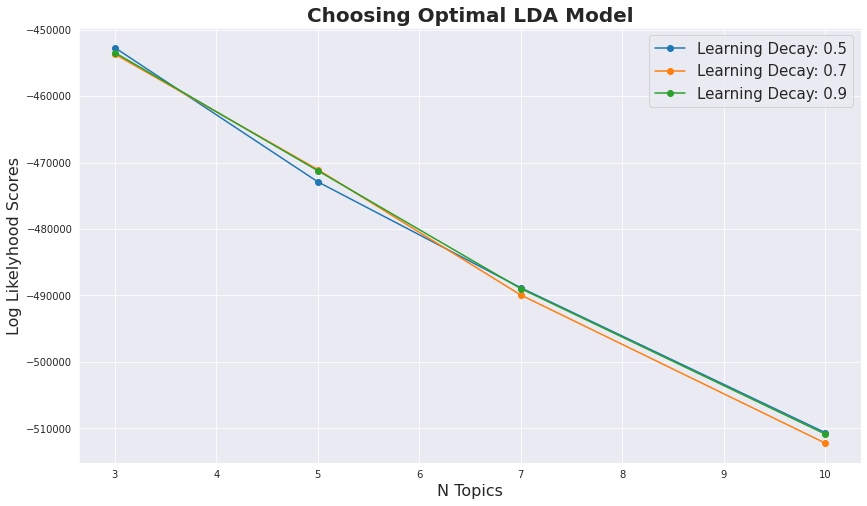

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Creditn : https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(14, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Choosing Optimal LDA Model", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('Log Likelyhood Scores', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


plot_grid_search(model.cv_results_, [3, 5, 7, 10], [.5, .7, .9], 'N Topics', 'Learning Decay')

##### Top 15 keyword for every topic

In [ ]:
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=bow, lda_model=best_lda_model, n_words=15) 

In [ ]:
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i+1) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i+1) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,chicken,order,taste,good,biryani,try,food,like,rice,veg,place,paneer,bad,one,fry
Topic 2,food,good,place,service,great,ambience,visit,time,staff,really,best,nice,taste,restaurant,one
Topic 3,place,good,order,food,one,service,get,time,nice,bad,even,visit,cake,taste,take


##### Visualising topic model

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(best_lda_model, X_bow, bow, mds='tsne')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  40.134761
0      -387.996002  -373.316162       2        1  33.924730
2     -2184.745605   -60.565800       3        1  25.940508, topic_info=             Term         Freq        Total Category  logprob  loglift
3338      chicken  2724.000000  2724.000000  Default  30.0000  30.0000
7216         food  5449.000000  5449.000000  Default  29.0000  29.0000
2174      biryani  1214.000000  1214.000000  Default  28.0000  28.0000
15003       place  5331.000000  5331.000000  Default  27.0000  27.0000
17576     service  2608.000000  2608.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
20771         try   323.472261  1675.010403   Topic3  -5.3537  -0.2951
11227        like   307.789312  1580.856690   Topic3  -5.4034  -0.2869
473          also   295.041632  1419.872892   Topic3  -5.4457  -0.2218
16212      really   289.227329  1512.203690   Topic3  -5.4656  -0.3047
6549   experience   275.206662  1051.273965   Topic3  -5.5153   0.0091

[274 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
25         1  0.984854      ab
82         1  0.018216  accept
82         2  0.054647  accept
82         3  0.929003  accept
420        1  0.017365   allow
...      ...       ...     ...
22200      3  0.306378   would
22215      2  0.992030    wrap
22482      1  0.206175  zomato
22482      2  0.277888  zomato
22482      3  0.515437  zomato

[470 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

##### Cluster Topics

###### SVD with 2 Components

In [ ]:
warnings.simplefilter(action='ignore', category=DeprecationWarning)

lda_output = best_lda_model.transform(X_bow)

clusters = KMeans(n_clusters=model.best_params_['n_components'], random_state=100).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=2)
lda_output_svd = svd_model.fit_transform(lda_output)

svd_2d_df = pd.DataFrame({'Component 1': lda_output_svd[:, 0], 'Component 2': lda_output_svd[:, 1], 'cluster': clusters })

print(f"Perc of Total Information Explained by two components: {np.round(svd_model.explained_variance_ratio_, 2)}", )

Perc of Total Information Explained by two components: [0.13 0.47]


In [ ]:
data = []

for i in range(model.best_params_['n_components']):
    filtered_cluster = svd_2d_df[svd_2d_df['cluster'] == i]
    trace = go.Scatter(
        x = filtered_cluster['Component 1'],
        y = filtered_cluster['Component 2'],
        mode = "markers",
        name = "Cluster " + str(i),
        marker = dict(color = generate_random_rgb_color_string()),
        text = None
    )
    data.append(trace)

title = "Visualizing Clusters in Two Dimensions Using Truncated SVD"

layout = dict(title = title,
        xaxis = dict(title= 'C1', ticklen= 5, zeroline= False),
        yaxis = dict(title= 'C2', ticklen= 5, zeroline= False)
    )

fig = dict(data = data, layout = layout)
iplot(fig)

We can see clear distinguished clusters of topics. SVD with 3 components is not possible as we've only 3 clusters

In [ ]:
df_reviews['topic_component'] = lda_output.argmax(axis=1)

In [ ]:
df_reviews[['Restaurant', 'Reviewer', 'Review', 'Rating', 'Followers', 'topic_component']].sample(5)

,Restaurant,Reviewer,Review,Rating,Followers,topic_component
9325,Zing's Northeast Kitchen,Priyanka Nair,"The place is very cosy and neat, not many big ...",4.0,11,1
6433,Hyderabad Chefs,Vamsi Krishna K,not good,1.0,0,1
6979,The Indi Grill,Abhishek Sahu .AS.,A very well maintained and very great service ...,5.0,2,1
9213,Collage - Hyatt Hyderabad Gachibowli,Anurag Reddy,Very very disappointed. Had been there for a S...,1.0,22,1
7244,Labonel,Shrav,the cake i bought started smelling bad the ver...,1.5,39,2


##### Predict Topic for new Texts

In [ ]:
def predict_topic(text, vectorizer=bow, lda_model=best_lda_model):
    processed_text = lemmatize_word(process_text(text))
    normalized_text = vectorizer.transform([processed_text])
    topic_probability_scores = lda_model.transform(normalized_text)
    topic = df_topic_keywords.iloc[topic_probability_scores.argmax(axis=1)]
    return topic, topic_probability_scores

In [ ]:
topic, topic_probability_scores = predict_topic('Nicely Lovely food, really enjoyed with family. \
I placed order first time and my family was not ready to take food from this restaurant \
but I placed order to see name and we really appreciate by them. Will order again and again. Thanx.')

print(f"Probablity score of Topic is : {topic_probability_scores}")
topic

Probablity score of Topic is : [[0.01956089 0.96154269 0.01889641]]


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 2,food,good,place,service,great,ambience,visit,time,staff,really,best,nice,taste,restaurant,one


In [ ]:
topic, topic_probability_scores = predict_topic('worst quality again. now never order in future...')

print(f"Probablity score of Topic is : {topic_probability_scores}")
topic

Probablity score of Topic is : [[0.07020865 0.06999003 0.85980132]]


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 3,place,good,order,food,one,service,get,time,nice,bad,even,visit,cake,taste,take


### Sentiment Analysis (Supervised)

#### Sentiment Labelling

As we've already preprocessed our text, now we will add label to our ratings, for every review, if given rating is greater than or equal to 3.5
 we're labelling it as Positive else it will be considered as negative reviews.

In [ ]:
def label_sentiment(rating):
  if float(rating) >=3.5:
    # positive sentiment
    return 1 
  else:
    # negative sentiment
    return 0

In [ ]:
df_reviews['Sentiment'] = df_reviews['Rating'].apply(label_sentiment)

df_reviews['Sentiment'].value_counts()

1    6315
0    3639
Name: Sentiment, dtype: int64

#### Defining Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import time

def cv_model(model, x_train, y_train, cv_params, n_splits=5, verbose=0):
    t = time.time()
    pipe = Pipeline([
            ('count', CountVectorizer()),
            ('model', model)
        ])

    cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=10)
    rs = HalvingGridSearchCV(pipe, cv_params, factor=3, cv=cv, verbose=verbose, n_jobs=-1, scoring='accuracy')

    rs.fit(x_train, y_train)

    print('Model Training Complete')
    print(f'Time taken {time.time() - t} seconds')
    return rs

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

def get_metrics(model, x, y):
    model_info = {}
    y_pred = model.predict(x)
    # y_pred_prob = model.predict_proba(x)
    model_info['accuracy'] = accuracy_score(y, y_pred)
    # model_info['roc_auc'] = roc_auc_score(y, y_pred_prob, multi_class='ovr')
    model_info['precision'] = precision_score(y, y_pred, average='macro')
    model_info['recall'] = recall_score(y, y_pred, average='macro')
    model_info['f1_score'] = f1_score(y, y_pred, average='macro')
    return model_info

In [ ]:
import json

def build_metrics(model, x, y, model_name, metrics_df=None, class_counts=2, pretty_print=True, params=None):
    metrics_dict = {
        'class_counts': class_counts,
        **get_metrics(model, x, y)
    }

    try:
        metrics_dict['best_params'] = str(model.best_params_)
    except AttributeError:
        metrics_dict['best_params'] = params

    if pretty_print:
        print(json.dumps(metrics_dict, indent=4))

    if metrics_df is None:
        return pd.DataFrame(metrics_dict, index=[model_name])
    else:
        metrics_df.loc[model_name] = metrics_dict
        return metrics_df

#### Model Training

we will train test split the data 0.2 test ratio and use pipeline to train & evaluate model performance

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_reviews['normalized_reviews'], df_reviews['Sentiment'], test_size=0.2, random_state=10)

In [ ]:
X_train.shape, X_test.shape

((7963,), (1991,))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

##### BernoulliNB

In [ ]:
cv_params = {
    'count__max_df': np.linspace(0.1, 1, 3),
    'count__max_features': np.linspace(5000, 10000, 3, dtype='int'),
    'model__alpha': np.linspace(0.01, 0.1, 10),
    'model__fit_prior': [True, False],
}

nb_model = cv_model(BernoulliNB(), X_train, y_train, cv_params, verbose=3)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 98
max_resources_: 7963
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 98
Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------
iter: 1
n_candidates: 60
n_resources: 294
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 2
n_candidates: 20
n_resources: 882
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 3
n_candidates: 7
n_resources: 2646
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 3
n_resources: 7938
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model Training Complete
Time taken 40.219648122787476 seconds


In [ ]:
model_metrics_df = build_metrics(nb_model, X_test, y_test, 'BernoulliNB')

{
    "class_counts": 2,
    "accuracy": 0.8538422903063787,
    "precision": 0.8465017848036716,
    "recall": 0.8335324031048339,
    "f1_score": 0.8391357692541558,
    "best_params": "{'count__max_df': 0.55, 'count__max_features': 5000, 'model__alpha': 0.1, 'model__fit_prior': True}"
}


##### LogisticsRegression

In [ ]:
cv_params = {
    'count__max_df': np.linspace(0.1, 1, 3),
    'count__max_features': np.linspace(5000, 10000, 3, dtype='int'),
    'model__penalty': ['l2'],
    'model__C': [100, 10, 1.0, 0.1, 0.01],
    'model__class_weight': ['balanced', None]
}

log_model = cv_model(LogisticRegression(), X_train, y_train, cv_params, verbose=3)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 98
max_resources_: 7963
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 98
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 1
n_candidates: 30
n_resources: 294
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 2
n_candidates: 10
n_resources: 882
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 4
n_resources: 2646
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 7938
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Model Training Complete
Time taken 32.92455577850342 seconds


In [ ]:
model_metrics_df = build_metrics(log_model, X_test, y_test, 'LogisticRegression', metrics_df=model_metrics_df)

{
    "class_counts": 2,
    "accuracy": 0.849824208940231,
    "precision": 0.8360341654375667,
    "recall": 0.8449426460899424,
    "f1_score": 0.8398874145556896,
    "best_params": "{'count__max_df': 1.0, 'count__max_features': 10000, 'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}"
}


##### LinearSVC

In [ ]:
cv_params = {
    'count__max_df': np.linspace(0.1, 1, 4),
    'count__max_features': np.linspace(5000, 10000, 3, dtype='int'),
    'model__C': np.linspace(0.1, 1, 6)
}

svc_model = cv_model(LinearSVC(max_iter=10000), X_train, y_train, cv_params, verbose=3)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 294
max_resources_: 7963
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 294
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 882
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 2646
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 7938
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model Training Complete
Time taken 29.378042936325073 seconds


In [ ]:
model_metrics_df = build_metrics(svc_model, X_test, y_test, 'LinearSVC', metrics_df=model_metrics_df)

{
    "class_counts": 2,
    "accuracy": 0.8392767453540935,
    "precision": 0.8318409154057945,
    "recall": 0.8152605250642477,
    "f1_score": 0.8220792422059136,
    "best_params": "{'count__max_df': 0.7, 'count__max_features': 10000, 'model__C': 0.1}"
}


##### KNeighboursClassifier

In [ ]:
cv_params = {
    'count__max_df': np.linspace(0.1, 1, 4),
    'count__max_features': np.linspace(5000, 10000, 3, dtype='int'),
    'model__n_neighbors': [2, 3, 5]
}

knn_model = cv_model(KNeighborsClassifier(), X_train, y_train, cv_params, verbose=3)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 294
max_resources_: 7963
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 294
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 12
n_resources: 882
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 4
n_resources: 2646
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 7938
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Model Training Complete
Time taken 68.15488409996033 seconds


In [ ]:
model_metrics_df = build_metrics(knn_model, X_test, y_test, 'KNeighborsClassifier', metrics_df=model_metrics_df)

{
    "class_counts": 2,
    "accuracy": 0.7287795077850326,
    "precision": 0.7073408906882591,
    "recall": 0.7094863018181342,
    "f1_score": 0.7083458117944244,
    "best_params": "{'count__max_df': 0.7, 'count__max_features': 10000, 'model__n_neighbors': 3}"
}


##### DecisionTreeClassifier

In [ ]:
cv_params = {
    'count__max_df': np.linspace(0.1, 1, 4),
    'count__max_features': np.linspace(5000, 10000, 3, dtype='int'),
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [200, 250, 300],
    'model__min_samples_leaf': [3, 6, 9, 12],
}

tree_model = cv_model(DecisionTreeClassifier(), X_train, y_train, cv_params, verbose=3)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 32
max_resources_: 7963
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 576
n_resources: 32
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
----------
iter: 1
n_candidates: 192
n_resources: 96
Fitting 5 folds for each of 192 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 64
n_resources: 288
Fitting 5 folds for each of 64 candidates, totalling 320 fits
----------
iter: 3
n_candidates: 22
n_resources: 864
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 4
n_candidates: 8
n_resources: 2592
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 7776
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model Training Complete
Time taken 73.6130702495575 seconds


In [ ]:
model_metrics_df = build_metrics(tree_model, X_test, y_test, 'DecisionTreeClassifier', metrics_df=model_metrics_df)

{
    "class_counts": 2,
    "accuracy": 0.801607232546459,
    "precision": 0.787166344272276,
    "recall": 0.7788498457618318,
    "f1_score": 0.7825085364110043,
    "best_params": "{'count__max_df': 0.4, 'count__max_features': 10000, 'model__criterion': 'entropy', 'model__max_depth': 200, 'model__min_samples_leaf': 9, 'model__splitter': 'best'}"
}


#### Model Evaluation

In [ ]:
def plot_coefficients(
    pipe        : Pipeline,
    vec_name    : str,
    model_name  : str,
    label       : int,
    title       : str,
    top_n       : int = 10
) -> None:
    """
    pipe : pipeline object
    vec_name : text vectorizer (CountVec, TfIdfVec) name in pipeline step
    model_name : name of model in pipeline step
    label : integer label like, 0 for negative, 2 for positive
    title : plot title
    top_n : no of features for each classes
    Reference : https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
    """
    
    features = np.array(pipe.named_steps[vec_name].get_feature_names_out())
    coef     = pipe.named_steps[model_name].coef_[label]
    
    top_positive_coefficients = np.argsort(coef)[-top_n:]
    top_negative_coefficients = np.argsort(coef)[:top_n]
    
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    colors = ["Positive" if c > 0 else "Negative" for c in coef[top_coefficients]]
    
    df = pd.DataFrame({"Word": features[top_coefficients],
                       "Similarity Probablity Score": coef[top_coefficients],
                       "Influence"  : colors})
    
    fig = px.bar(df, y = "Similarity Probablity Score", x ="Word", 
                 title=title,
                 color="Influence",
                 category_orders={'Influence':['Negative','Positive']},
                 color_discrete_sequence=['red','blue']
            )

    fig.update_layout(legend_traceorder="reversed")
    fig.show()

In [ ]:
def plot_comparison(
    metrics_df  : pd.DataFrame,
    x           : str,
    y           : str,
    hue         : str = None,
    title       : str = 'Comparison of Model Metrics',
    figsize     : tuple = (20, 10)
) -> None:
    """
    Plot the comparison barplot between different models evaluation metrics
    """
    plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, data=metrics_df, hue=hue, palette='hot')
    plt.title(title)
    plt.show()

In [ ]:
from numpy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_roc_pr(
    y_pred   : np.ndarray,
    y_test    : np.ndarray,
    pos_label = 'Positive'
) -> None:
    """
    Plots the ROC + Precision recall curves for 
    Credit: https://github.com/mdh266/TextClassificationApp/blob/master/notebooks/utils/Plot_ROC_PR_Curve.py
    """
    n_classes = y_test.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # Plot all ROC curves

    # First aggregate all false positive rates
    lw      =2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))


    ax1.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='gold', linestyle=':', linewidth=4)

    ax1.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    for i, color in zip(range(n_classes), colors):
        ax1.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    ax1.plot([0, 1], [0, 1], 'k--', lw=lw)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Extension of Receiver operating characteristic to multi-class')
    ax1.legend(loc="lower left")
    # ax1.show()


    # setup plot details

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            y_pred[:, i])

        average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
                                                                    y_pred.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                         average="micro")

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    # plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)


    l, = ax2.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))


    for i, color in zip(range(n_classes), colors):
        l, = ax2.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    # fig = plt.gcf()
    # fig.subplots_adjust(bottom=0.25)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Extension of Precision-Recall curve to multi-class')
    ax2.legend(lines, labels) #, loc=(0, -.38), prop=dict(size=14))

##### Metrics Evaluation

In [ ]:
print("Metrics obtained from different Trained Models")

model_metrics_df.sort_values('f1_score', ascending=False)

Metrics obtained from different Trained Models


,class_counts,accuracy,precision,recall,f1_score,best_params
LogisticRegression,2,0.849824,0.836034,0.844943,0.839887,"{'count__max_df': 1.0, 'count__max_features': ..."
BernoulliNB,2,0.853842,0.846502,0.833532,0.839136,"{'count__max_df': 0.55, 'count__max_features':..."
LinearSVC,2,0.839277,0.831841,0.815261,0.822079,"{'count__max_df': 0.7, 'count__max_features': ..."
DecisionTreeClassifier,2,0.801607,0.787166,0.778850,0.782509,"{'count__max_df': 0.4, 'count__max_features': ..."
KNeighborsClassifier,2,0.728780,0.707341,0.709486,0.708346,"{'count__max_df': 0.7, 'count__max_features': ..."


In [ ]:
model_metrics_df['model'] = model_metrics_df.index

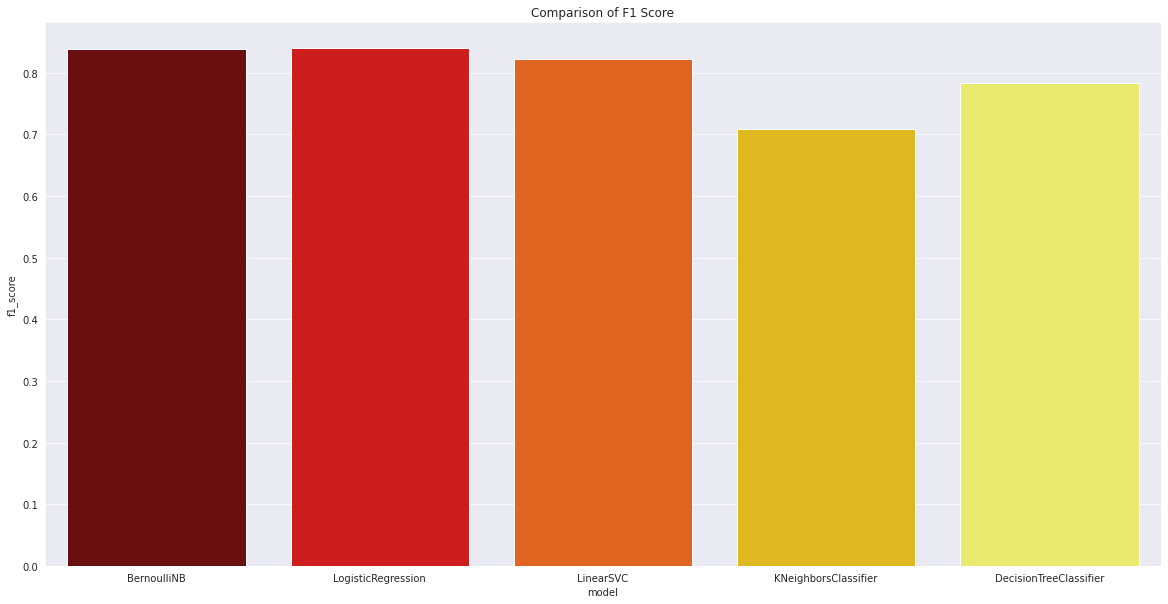

In [ ]:
plot_comparison(model_metrics_df, x='model', y='f1_score',
            title='Comparison of F1 Score')

LogisticsRegression is the model with best performance metrics, though the result is almost similar to BernoulliNB. We're considering the model trained with LogisticsRegression as our final model for supervised sentiment analysis part.

#### Final Model

In [ ]:
log_pipe = Pipeline([('count', CountVectorizer(max_df=1.0, max_features=10000)),
                    ('model', LogisticRegression(class_weight='balanced', C=0.1, penalty='l2'))])

_ = log_pipe.fit(X_train, y_train)

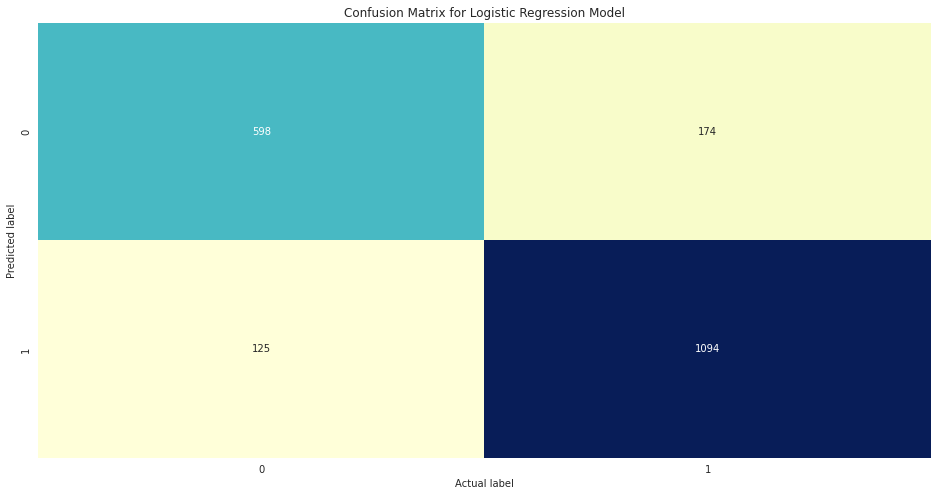

In [ ]:
y_pred = log_pipe.predict(X_test)

plt.figure(figsize=(16, 8))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cmap="YlGnBu", cbar=False)

plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score, classification_report

print(classification_report(y_test, y_pred))

print("Balanced Accuracy Score is : {}".format(balanced_accuracy_score(y_test, y_pred)))
print("Average Weighted F1 Score is : {}".format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       723
           1       0.90      0.86      0.88      1268

    accuracy                           0.85      1991
   macro avg       0.84      0.84      0.84      1991
weighted avg       0.85      0.85      0.85      1991

Balanced Accuracy Score is : 0.8449426460899424
Average Weighted F1 Score is : 0.8508058680628974


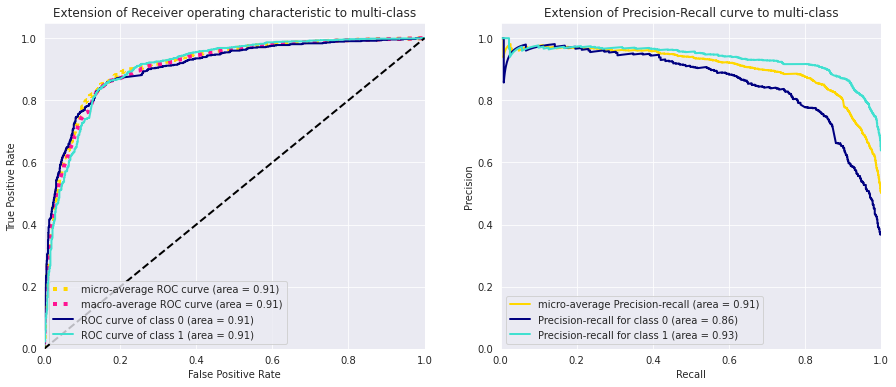

In [ ]:
from sklearn.preprocessing import label_binarize

y_pred_proba = log_pipe.predict_proba(X_test)
classes   = np.sort(y_test.unique())
y_test_lb = label_binarize(y_test, 
                        classes=classes)

# for 2 class, label binarizer returning vector
# so we've used hstack to create shape
y_test_lb = np.hstack((1 - y_test_lb, y_test_lb))

plot_roc_pr(y_pred_proba, y_test_lb)

In [ ]:
plot_coefficients(
    pipe        = log_pipe,
    vec_name    = 'count',
    model_name  = 'model',
    label       = 0,
    title      = "Top 15 Influential Words",
    top_n      = 15
)

##### Sentiment Prediction

In [ ]:
def predict_sentiment(text: list):
    label_map = {0: 'Negative', 1: 'Positive'}
    prediction = log_pipe.predict(text)[0]
    lbl_proba = log_pipe.predict_proba(text)
    if label_map[prediction] == 'Positive':
        decision_func  = lbl_proba[0][1]
    else:
        decision_func  = lbl_proba[0][0]

    return {
        'sentiment': label_map[prediction],
        'confidence': decision_func
    }

In [ ]:
predict_sentiment(["Ohhhh my gawwwd what an amazing food and outstanding env to spend eves here"])

{'confidence': 0.6477256117630295, 'sentiment': 'Positive'}

In [ ]:
predict_sentiment(["Most ferocious behaviour of staffs and the food stinks"])

{'confidence': 0.5742540494672165, 'sentiment': 'Negative'}

### Reference

*  https://towardsdatascience.com/how-to-create-dynamic-3d-scatter-plots-with-plotly-6371adafd14
*   https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.htmlhttps://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
*   http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/
*   https://highdemandskills.com/topic-model-evaluation/